In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import sf_utils

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from statannotations.Annotator import Annotator


import seaborn as sns

sc.settings.set_figure_params(dpi=80, facecolor='white', fontsize=14, scanpy=True, format='pdf')
sc.set_figure_params(figsize=(5,5))

sc.settings.verbosity=3

In [2]:
adata_mult_coembed = sc.read_h5ad("../proc_files/lsk_full_coembed_byday_byassay.h5ad")

## CCE fate bias embeddings

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


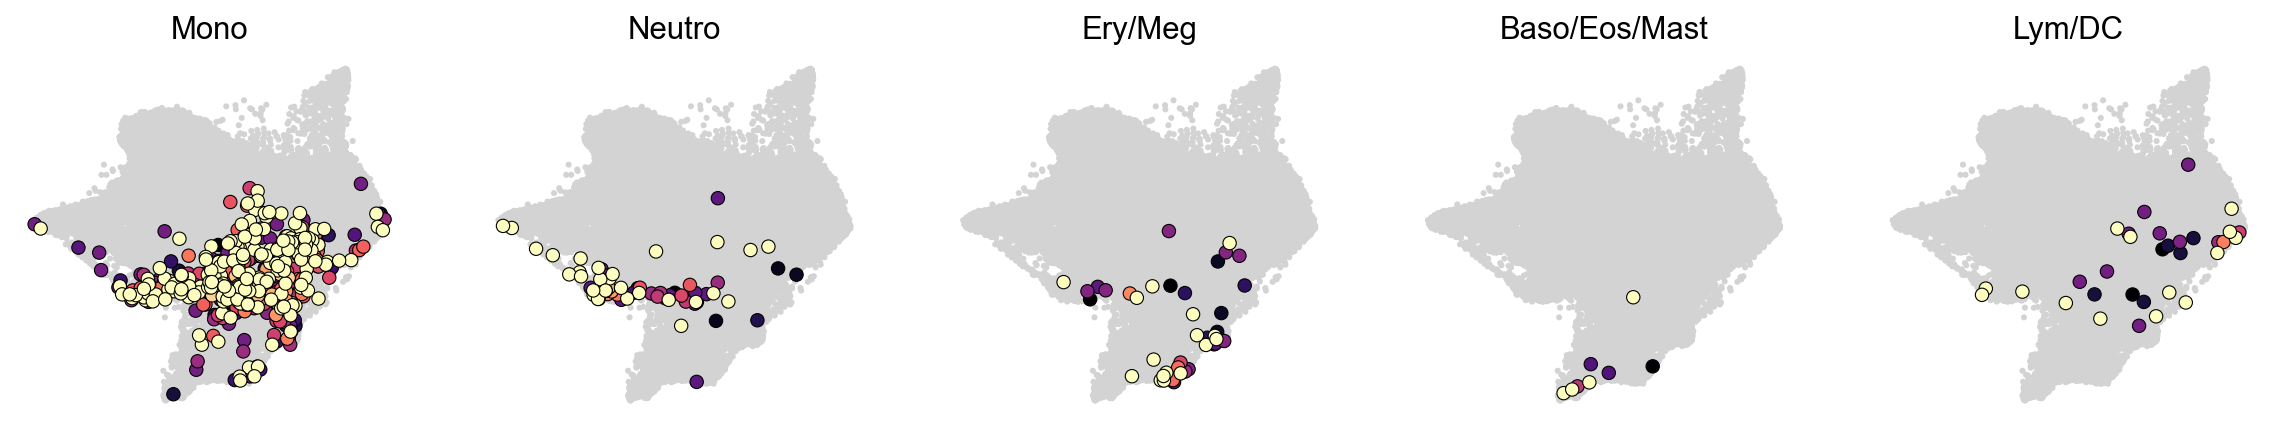

In [3]:
fig=plt.figure(figsize=(18,3))
gs = GridSpec(1,5)

ax=plt.subplot(gs[0])
for i,j in zip(gs,['Mono','Neutro','Ery/Meg','Baso/Eos/Mast','Lym/DC']):
    ax=plt.subplot(i)
    sc.pl.draw_graph(adata_mult_coembed,s=30, show=False, ax=ax, frameon=False)
    if(j=="state subclones"):
        sc.pl.draw_graph(adata_mult_coembed[(adata_mult_coembed.obs.clone_type=='state')],s=70, na_color="royalblue",
                         show=False,ax=ax, frameon=False, add_outline=True, outline_width=(0.2,0))
        
    coords_curr_x = adata_mult_coembed.obsm['X_draw_graph_fa'][(adata_mult_coembed.obs.fate.isin([j])) & (adata_mult_coembed.obs.clone_type=='state_atac'),0]
    coords_curr_y = adata_mult_coembed.obsm['X_draw_graph_fa'][(adata_mult_coembed.obs.fate.isin([j])) & (adata_mult_coembed.obs.clone_type=='state_atac'),1]
    coords_hue = adata_mult_coembed.obs.loc[(adata_mult_coembed.obs.fate.isin([j])) & (adata_mult_coembed.obs.clone_type=='state_atac'),'fate_pct']
    df_curr = pd.DataFrame((coords_curr_x,coords_curr_y, coords_hue), index=['x','y','hue']).T.sort_values('hue')
    sns.scatterplot(x='x', y='y', hue='hue', data=df_curr, vmin=30, vmax=100, legend=False, edgecolor='black', linewidth=0.5, palette='magma')
    plt.title(j)
    
# plt.savefig("plots/cc_emb_atacstate_subclone_fate_pct.pdf")

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


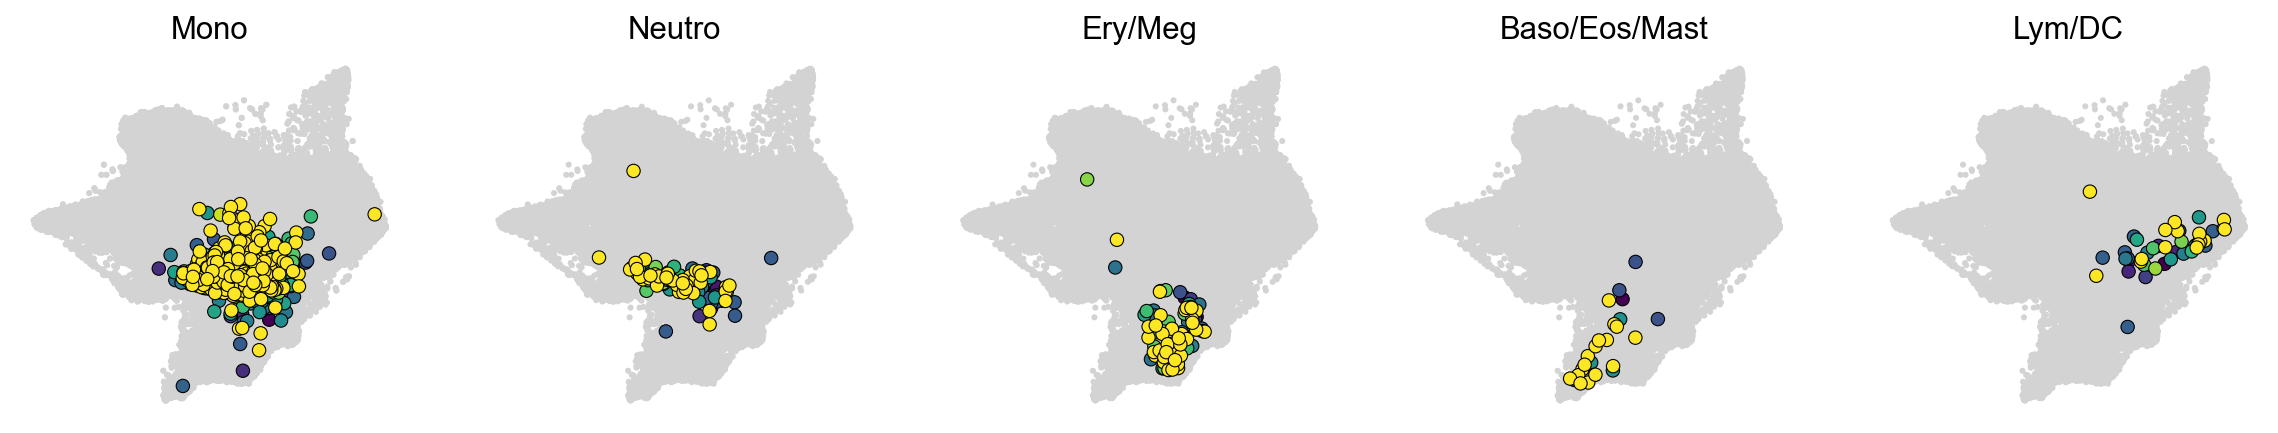

In [11]:
fig=plt.figure(figsize=(18,3))
gs = GridSpec(1,5)

ax=plt.subplot(gs[0])
sc.pl.draw_graph(adata_mult_coembed,s=30, show=False, ax=ax)

for i,j in zip(gs,['Mono','Neutro','Ery/Meg','Baso/Eos/Mast','Lym/DC']):
    ax=plt.subplot(i)
    sc.pl.draw_graph(adata_mult_coembed,s=30, show=False, ax=ax, frameon=False)
    if(j=="state subclones"):
        sc.pl.draw_graph(adata_mult_coembed[(adata_mult_coembed.obs.clone_type=='state')],s=70, na_color="royalblue",
                         show=False,ax=ax, frameon=False, add_outline=True, outline_width=(0.2,0))
        
    coords_curr_x = adata_mult_coembed.obsm['X_draw_graph_fa'][(adata_mult_coembed.obs.fate.isin([j])) & (adata_mult_coembed.obs.clone_type=='state_rna'),0]
    coords_curr_y = adata_mult_coembed.obsm['X_draw_graph_fa'][(adata_mult_coembed.obs.fate.isin([j])) & (adata_mult_coembed.obs.clone_type=='state_rna'),1]
    coords_hue = adata_mult_coembed.obs.loc[(adata_mult_coembed.obs.fate.isin([j])) & (adata_mult_coembed.obs.clone_type=='state_rna'),'fate_pct']
    df_curr = pd.DataFrame((coords_curr_x,coords_curr_y, coords_hue), index=['x','y','hue']).T.sort_values('hue')
    sns.scatterplot(x='x', y='y', hue='hue', data=df_curr, vmin=30, vmax=100, legend=False, edgecolor='black', linewidth=0.5, palette='viridis')
    plt.title(j)
    
# plt.savefig("plots/cc_emb_state_rnasubclone_fate_pct.pdf")

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


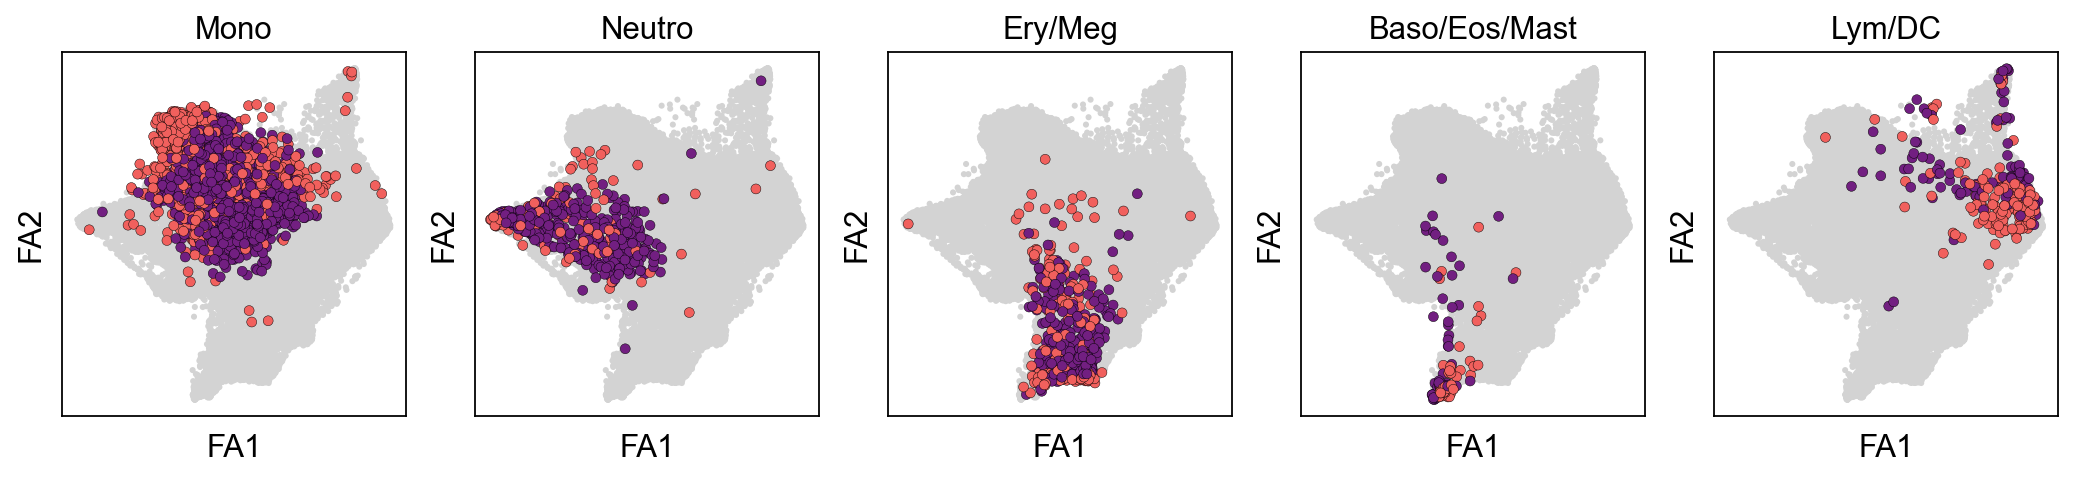

In [12]:
#fate clones
fig=plt.figure(figsize=(16,3))
gs = GridSpec(1,5)

ax=plt.subplot(gs[0])
# sc.pl.draw_graph(adata_mult_coembed,s=30, show=False, ax=ax, frameon=False)

for i,j in zip(gs,['Mono','Neutro','Ery/Meg','Baso/Eos/Mast','Lym/DC']):
    ax=plt.subplot(i)
    sc.pl.draw_graph(adata_mult_coembed,s=30, show=False, ax=ax, frameon=True)
        
    coords_curr_x = adata_mult_coembed.obsm['X_draw_graph_fa'][(adata_mult_coembed.obs.fate.isin([j])) & (adata_mult_coembed.obs.clone_type.isin(['fate_atac', 'fate_rna'])),0]
    coords_curr_y = adata_mult_coembed.obsm['X_draw_graph_fa'][(adata_mult_coembed.obs.fate.isin([j])) & (adata_mult_coembed.obs.clone_type.isin(['fate_atac', 'fate_rna'])),1]
    coords_hue = adata_mult_coembed.obs.loc[(adata_mult_coembed.obs.fate.isin([j])) & (adata_mult_coembed.obs.clone_type.isin(['fate_atac', 'fate_rna'])),'clone_type'].map(lambda x:x.split("_")[-1])
    df_curr = pd.DataFrame((coords_curr_x,coords_curr_y, coords_hue), index=['x','y','hue']).T.sort_values('hue')
    df_curr = df_curr.sample(frac=1)
    sns.scatterplot(x='x', y='y', hue='hue', data=df_curr, vmin=30, vmax=100, legend=False, edgecolor='black', linewidth=0.2, s=20, palette='magma')
    plt.title(j)
    
# plt.savefig("plots/cc_emb_fate_subclone_assay.pdf")

In [14]:
#add time point to cells
adata_mult_coembed.obs['day_cell'] = adata_mult_coembed.obs.apply(lambda x:x.name[:2] if x['node_type']=='cell' else 'clone', axis=1)

In [27]:
adata_mult_coembed.uns['day_cell_colors'][1] = '#ff990c'
adata_mult_coembed.uns['day_cell_colors'][2] = '#550000'

In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


Text(0.5, 1.0, 'Clone nodes')

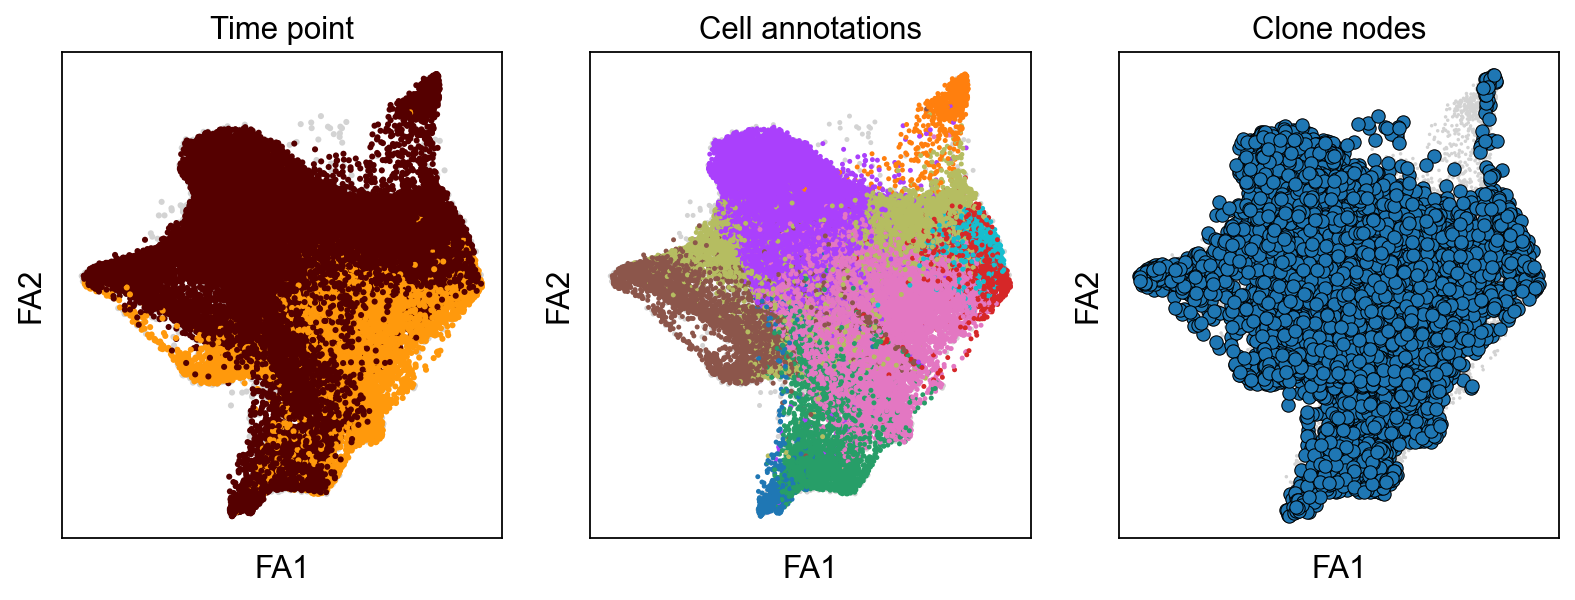

In [28]:
fig = plt.figure(figsize=(12,4))
gs = GridSpec(1,3)

ax = plt.subplot(gs[0])
sc.pl.draw_graph(adata_mult_coembed, s=30, color='day_cell',groups=['d2','d5'], frameon=True, ax=ax, show=False, legend_loc='')
plt.title('Time point')


ax = plt.subplot(gs[1])
sc.pl.draw_graph(adata_mult_coembed, color='final_celltype_simplified', s=20, ax=ax, show=False, legend_loc='')
plt.title('Cell annotations')


ax = plt.subplot(gs[2])
sc.pl.draw_graph(adata_mult_coembed,s=10, ax=ax, show=False, legend_loc='')
sns.scatterplot(x=adata_mult_coembed[adata_mult_coembed.obs.node_type=='clone'].obsm['X_draw_graph_fa'][:,0],
               y=adata_mult_coembed[adata_mult_coembed.obs.node_type=='clone'].obsm['X_draw_graph_fa'][:,1], edgecolor='black')
plt.title('Clone nodes')

# plt.savefig("../proc_files/plots/cc_emb_days_annot_clones.pdf")

In [4]:
adata_mult_coembed.obs['assay'] = adata_mult_coembed.obs_names.map(lambda x:x.split("-")[1] if (len(x.split("-"))>1) else "clone")

# Plot modality of cce

In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


Text(0.5, 1.0, 'Assay')

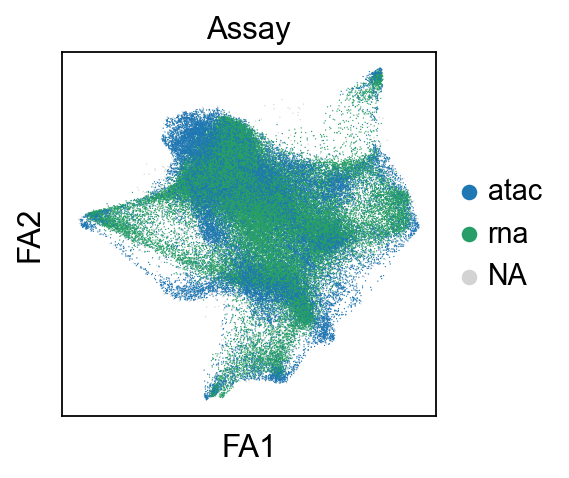

In [7]:
fig = plt.figure(figsize=(3,3))
gs = GridSpec(1,1)

ax = plt.subplot(gs[0])
sc.pl.draw_graph(adata_mult_coembed, color='assay',groups=['rna','atac'], frameon=True, ax=ax, show=False)
plt.title('Assay')


# plt.savefig("../proc_files/plots/cc_emb_assays.pdf", dpi=300)

# Calculate overlap between state clones from the same lineage

- Create 30 dim vector for each point with UMAP
- Find wasserstein using scipy in each dim, take average

In [3]:
adata_mult_coembed.obsm['X_ccal2'] = np.zeros((adata_mult_coembed.shape[0],100))

In [4]:
sc.tl.umap(adata_mult_coembed,n_components=30)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:04:26)


In [5]:
from scipy.stats import wasserstein_distance

In [6]:
emb_df = pd.DataFrame(adata_mult_coembed.obsm['X_umap'], index=adata_mult_coembed.obs_names)
emb_df = emb_df.merge(adata_mult_coembed.obs[['fate', 'clone_type']], right_index=True, left_index=True).copy()
emb_df = emb_df[emb_df['clone_type'].apply(lambda x:"state_" in x)].iloc[:,:-1].copy()

In [30]:
centroid_dict = {}

for i,j in emb_df.groupby('fate'):
    centroid_dict[i] = j.mean().values

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [99]:
distances_dict = {}
# distances_dict2 = {}
for i in ['Baso/Eos/Mast', 'Ery/Meg', 'Lym/DC', 'Mono', 'Neutro']:
    
    mtx_curr = emb_df[emb_df['fate']==i].iloc[:,:-1]
    df = pd.DataFrame()
    df2 = pd.DataFrame()
    
    for j in ['Baso/Eos/Mast', 'Ery/Meg', 'Lym/DC', 'Mono', 'Neutro']:
        
        #calculate distances of sub-clones from centroid of alt fate grps
        if(j !=i):
            df = pd.concat((df, np.sqrt(((mtx_curr - centroid_dict[j])**2).sum(axis=1)).to_frame(j)), axis=1)
            # print(df)
            
        #calculate distances of sub-clones from centroid of their own fates
        if(j ==i):
            df2 = pd.concat((df2, np.sqrt(((mtx_curr - centroid_dict[j])**2).sum(axis=1)).to_frame(j)), axis=1)
            
    df = df.min(axis=1).to_frame(i)
    distances_dict[i] = df

In [101]:
for i in ['Baso/Eos/Mast', 'Ery/Meg', 'Lym/DC', 'Mono', 'Neutro']:
    distances_dict[i].index

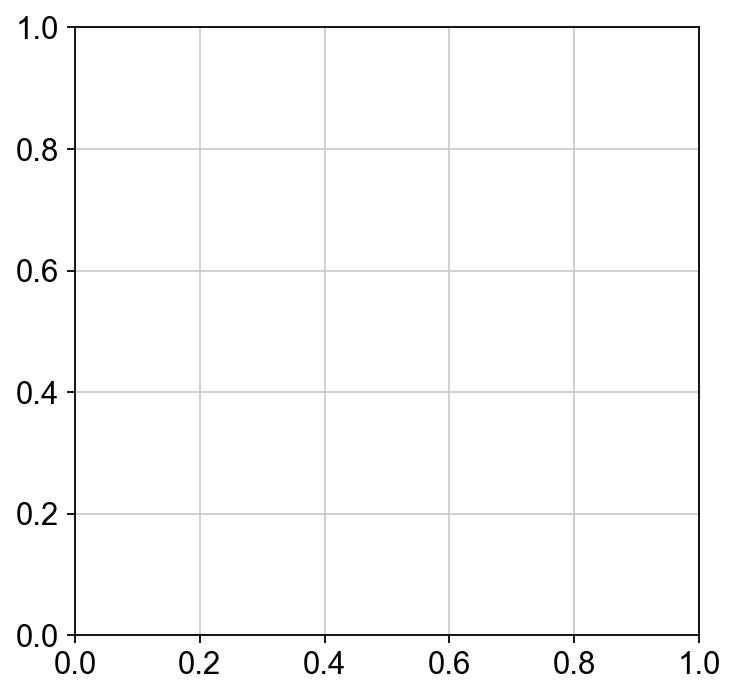

In [ ]:
df = pd.DataFrame()
ax=plt.axes()
for i in ['Baso/Eos/Mast', 'Ery/Meg', 'Lym/DC', 'Mono', 'Neutro']:
    
    temp_var = distances_dict[i]
    list_curr = []
    
    for a in range(0,100,5):
        cells_pass = temp_var.index[(temp_var.values >= np.percentile(temp_var.values,a)).flatten()]
        # print(a, len(cells_pass))
        list_curr.append(adata_mult_coembed.obs.loc[cells_pass,'fate_pct'].mean())
    
    df = pd.concat((df,pd.DataFrame(list_curr, columns=[i], index = list(range(0,100,5)))), axis=1)

In [11]:
# df.to_csv("../proc_files/plots_data/fate_bias_periphery_clones.csv")
df = pd.read_csv("../proc_files/plots_data/fate_bias_periphery_clones.csv", index_col=0)

In [21]:
# emb_df.to_csv("../proc_files/umap_clones_30dim.csv")
emb_df = pd.read_csv("../proc_files/umap_clones_30dim.csv", index_col=0)

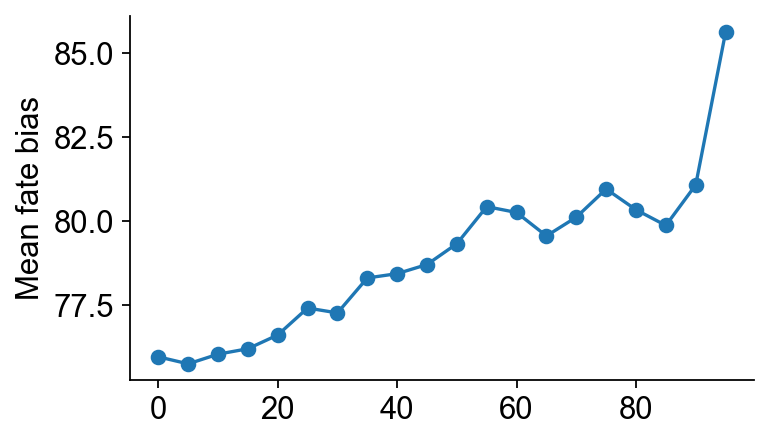

In [12]:
ax=plt.axes()
df.mean(axis=1).to_frame().plot(kind='line', legend=False, figsize=(5,3), marker="o", ax=ax)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.ylabel('Mean fate bias')
plt.grid(False)
# plt.ylim(70,90)
# plt.savefig("plots/fate_bias_periphery_clones.pdf")

In [14]:
del df

# Do distances between all possible fate pairs and plot as a heatmap and violin plot

In [25]:
from scipy.stats import wasserstein_distance

In [26]:
df = pd.DataFrame(index=['Mono','Neutro','Ery/Meg','Baso/Eos/Mast','Lym/DC'], columns=['Mono','Neutro','Ery/Meg','Baso/Eos/Mast','Lym/DC'])

for i in ['Mono','Neutro','Ery/Meg','Baso/Eos/Mast','Lym/DC']:  #atac fates
    for j in ['Mono','Neutro','Ery/Meg','Baso/Eos/Mast','Lym/DC']:  #rna fates
        atac_clones = emb_df.loc[adata_mult_coembed.obs[(adata_mult_coembed.obs.fate==i) & 
                                                        (adata_mult_coembed.obs.clone_type=='state_atac')].index]
        rna_clones = emb_df.loc[adata_mult_coembed.obs[(adata_mult_coembed.obs.fate==j) & 
                                                       (adata_mult_coembed.obs.clone_type=='state_rna')].index]
        dist = []
        for dim_num in range(emb_df.shape[1]-1):
            dist.append(wasserstein_distance(atac_clones.iloc[:,dim_num], rna_clones.iloc[:,dim_num]))
        df.loc[i,j] = 1 - np.mean(dist)

In [27]:
inter_lin = np.diag(df)

x = np.where(~np.eye(len(df),dtype=bool))
intra_lin = np.array([df.iloc[i[0],i[1]] for i in zip(x[0],x[1])])

In [28]:
inter_lin = np.stack((inter_lin,['inter_lin']*len(inter_lin)))
intra_lin = np.stack((intra_lin,['intra_lin']*len(intra_lin)))

In [29]:
dist_df = pd.DataFrame(np.hstack((inter_lin,intra_lin)), index = ['vals','grp']).T

In [30]:
dist_df['vals'] = dist_df['vals'].astype(float)

inter_lin vs. intra_lin: Mann-Whitney-Wilcoxon test two-sided, P_val:3.764e-05 U_stat=1.000e+02


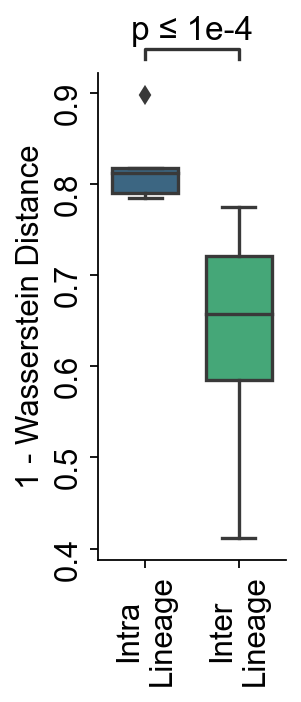

In [32]:
with plt.rc_context({'font.size': 15}):
    plt.figure(figsize=(1.5,4))
    sns.boxplot(x = 'grp',y='vals',data=dist_df, palette='viridis', width=0.7)
    plt.grid(False)
    plt.xlabel("")
    plt.ylabel("1 - Wasserstein Distance")
    plt.xticks(ticks=[0,1], labels=['Intra\nLineage', 'Inter\nLineage'], rotation=90)
    plt.yticks(rotation=90)

    ax=plt.gca()
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    pairs=[("inter_lin", "intra_lin")]
    x='grp'
    y='vals'
    annotator = Annotator(ax, pairs, data=dist_df, x=x, y=y)
    annotator.configure(test='Mann-Whitney', text_format
                        ='simple', loc='outside', show_test_name=False)
    annotator.apply_and_annotate()
    # plt.savefig("plots/pairwise_wasserstein_stategrps_boxplot.pdf")